In [1]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 10] #resize of the matplotlib's figures

#import seaborn as sns
import datetime as DT
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_patientfiles = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /Grenoble.csv')
df_timedata = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /Grenoble_raw.csv')

In [3]:
df_timedata.head()

,UNID,Time,MonDay,SBP,DBP,HR,ERR,Event,VISIT,Valid
0,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:25:00,1,54,29,60,2,NaN,1,1
1,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:55:00,1,62,38,60,2,NaN,1,1
2,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:40:00,1,64,33,59,2,NaN,1,1
3,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,16MAR12:21:43:00,1,67,49,68,1,NaN,1,1
4,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:16:10:00,1,68,44,60,1,NaN,1,1


In [4]:
df_timedata.shape

(22216, 10)

In [5]:
df_patientfiles.head()

,num,Age__years_,VAR3,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,VAR6,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nDBPnFix,nHRnFix,nSBPsdnFix,nMBPsdnFix,nDBPsdnFix,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI
0,1,42,M,no,no,no,no,yes,28,no,...,71.86667,99.30000,35.115380,25.355420,21.948370,21.681260,12.865390,10.173080,6.846154,0.370339
1,2,58,M,no,no,no,yes,no,16.25,yes,...,65.00000,54.75000,8.956460,8.295672,9.672830,4.390071,8.256757,6.148649,6.054054,0.406565
2,5,48,F,no,no,no,yes,yes,18,no,...,61.75000,69.08334,10.227710,7.246734,8.465169,7.153617,9.131147,7.131147,8.459017,0.427954
3,7,73,M,yes,no,no,yes,no,32,yes,...,68.83334,49.25000,8.233400,8.305955,10.049320,1.751190,10.222220,8.000000,2.666667,0.497447
4,8,51,M,no,no,yes,no,no,0,yes,...,66.41666,76.08334,7.577878,5.736645,4.601548,5.247654,10.250000,6.776316,5.552631,0.649434


In [6]:
df_patientfiles.shape

(283, 87)

In [7]:
df_timedata.isnull().sum()

UNID          0
Time          0
MonDay        0
SBP           0
DBP           0
HR            0
ERR           0
Event     22100
VISIT         0
Valid         0
dtype: int64

In [8]:
list_unique_unid = df_timedata['UNID'].unique()

In [9]:
len(list_unique_unid)

283

In [10]:
#drop Event, ERR, VISIT, MonDay and Valid  column 
df_timedata = df_timedata.drop(["Event","ERR","VISIT","Valid"], axis=1)

In [11]:
df_timedata.isnull().sum()

UNID      0
Time      0
MonDay    0
SBP       0
DBP       0
HR        0
dtype: int64

In [12]:
df_timedata.head()

,UNID,Time,MonDay,SBP,DBP,HR
0,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:25:00,1,54,29,60
1,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:55:00,1,62,38,60
2,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:40:00,1,64,33,59
3,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,16MAR12:21:43:00,1,67,49,68
4,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:16:10:00,1,68,44,60


In [13]:
#df_timedata['Time'] = pd.to_datetime(df_timedata['Time'], format = "%d%b%y:%H:%M:%S").dt.time
#print(df_timedata)

In [14]:
#df_timedata.to_csv('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /timeframe1.csv', index = False)

In [15]:
list_unique_unid = df_timedata['UNID'].unique()
len(list_unique_unid)

283

In [16]:
df_patientfiles.rename(columns={"UnID": "UNID","VAR3":"Sex","VAR6":"Presence_of_diabetes","VAR15":"BMI","VAR41":"Clinic_seated_sbp","VAR42":"Clinic_seated_dbp","VAR45":"AHI_tot","VAR46":"Mean_nocturnal_satO2","VAR47":"Min_nocturnal_satO2","VAR49":"PWV","VAR50":"Delay_time_car_fem","VAR51":"Car_fem_distance","VAR52":"Creatinine","VAR53":"Glucose","VAR54":"Total_cholesterol","VAR55":"Triglycerides","VAR56":"HDL","VAR57":"LDL"}, inplace=True)

df_patientfiles.head()


,num,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nDBPnFix,nHRnFix,nSBPsdnFix,nMBPsdnFix,nDBPsdnFix,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI
0,1,42,M,no,no,no,no,yes,28,no,...,71.86667,99.30000,35.115380,25.355420,21.948370,21.681260,12.865390,10.173080,6.846154,0.370339
1,2,58,M,no,no,no,yes,no,16.25,yes,...,65.00000,54.75000,8.956460,8.295672,9.672830,4.390071,8.256757,6.148649,6.054054,0.406565
2,5,48,F,no,no,no,yes,yes,18,no,...,61.75000,69.08334,10.227710,7.246734,8.465169,7.153617,9.131147,7.131147,8.459017,0.427954
3,7,73,M,yes,no,no,yes,no,32,yes,...,68.83334,49.25000,8.233400,8.305955,10.049320,1.751190,10.222220,8.000000,2.666667,0.497447
4,8,51,M,no,no,yes,no,no,0,yes,...,66.41666,76.08334,7.577878,5.736645,4.601548,5.247654,10.250000,6.776316,5.552631,0.649434


In [17]:
list_unique_unid_2 = df_patientfiles['UNID'].unique()

In [18]:
len(list_unique_unid_2)

283

In [19]:
list_unique_unid_3 = df_patientfiles['AHI_tot'].unique()

In [20]:
len(list_unique_unid_3)

227

In [21]:
#Classify the OSA severity of patients by the aHI values:
#<5=normal, 5<x<15 mild, 15<x<30 moderate, >30 severe.

#Create the OSA Severity column with just a random value.
df_patientfiles['OSA_Severity']='N'

#Then replace the N with the number representing the severity of OSA value

#(Normal=1, Mild=2, Moderate=3, Severe=4)

for i in range(0,len(df_patientfiles)):
    if df_patientfiles.loc[i,'AHI_tot']<=5:
        df_patientfiles.loc[i,'OSA_Severity']='1'
    elif df_patientfiles.loc[i,'AHI_tot']<=15:
        df_patientfiles.loc[i,'OSA_Severity']='2'
    elif df_patientfiles.loc[i,'AHI_tot']<=30:
        df_patientfiles.loc[i,'OSA_Severity']='3'
    elif df_patientfiles.loc[i,'AHI_tot']>30:
        df_patientfiles.loc[i,'OSA_Severity']='4'
#print(df_patientfiles)

In [22]:
list_unique_unid_4 = df_patientfiles['OSA_Severity'].unique()

list_unique_unid_4


array(['4', '3', '2'], dtype=object)

In [23]:
len(list_unique_unid_4)

3

In [24]:
df_patientfiles['OSA_Severity'].value_counts()

4    193
3     83
2      7
Name: OSA_Severity, dtype: int64

In [25]:
df_patient_2 = df_patientfiles[['UNID', 'OSA_Severity']]

In [26]:
df_patient_2.head()

,UNID,OSA_Severity
0,d1e81ac5-d7f3-4e83-aa02-6b36f517fc60,4
1,100b6949-5b84-47c8-b8f5-cc24db323288,4
2,fc7f9de0-f972-438f-8c04-e47fee2b4d7e,3
3,a758b176-096d-4b6b-a2ff-29c572b56db9,4
4,d012f10b-5add-49ac-b2bf-dd6e94567d01,4


In [27]:
df_patient_2['OSA_Severity'].value_counts()

4    193
3     83
2      7
Name: OSA_Severity, dtype: int64

In [28]:
df_patient_2.dtypes

UNID            object
OSA_Severity    object
dtype: object

In [29]:
df_new_merge = df_timedata.merge(df_patient_2, how='inner', on='UNID')

In [30]:
df_patient_mild = df_new_merge[df_new_merge["OSA_Severity"]=='2']
df_patient_mild = df_patient_mild[df_patient_mild["MonDay"].isin([1,2,3,4])]
df_patient_mild['MonDay'].value_counts()

2    331
1    210
Name: MonDay, dtype: int64

In [31]:
df_temp= df_patient_mild
df_temp['Timestamp'] = 'Jan '+df_temp['MonDay'].astype(str)+' 2011 '+df_temp['Time'].str.split(':',n=1).str[-1]
df_patient_mild = df_temp.drop(['Time', 'MonDay'], axis=1)
df_patient_mild

,UNID,SBP,DBP,HR,OSA_Severity,Timestamp
824,4080ad0e-b212-44ab-a25e-86a773f89413,74,41,87,2,Jan 2 2011 02:34:00
825,4080ad0e-b212-44ab-a25e-86a773f89413,79,37,82,2,Jan 2 2011 04:04:00
826,4080ad0e-b212-44ab-a25e-86a773f89413,82,62,101,2,Jan 1 2011 12:49:00
827,4080ad0e-b212-44ab-a25e-86a773f89413,82,43,88,2,Jan 2 2011 03:04:00
828,4080ad0e-b212-44ab-a25e-86a773f89413,86,53,82,2,Jan 2 2011 04:34:00
...,...,...,...,...,...,...
21269,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,175,68,86,2,Jan 1 2011 15:50:00
21270,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,176,75,84,2,Jan 2 2011 14:50:00
21271,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,177,81,90,2,Jan 1 2011 15:05:00
21272,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,180,79,84,2,Jan 1 2011 17:35:00


In [32]:
df_patient_mild['Timestamp'] = pd.to_datetime(df_patient_mild['Timestamp'], format = "%b %d %Y %H:%M:%S")

In [33]:
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%d-%H:%M:%S")

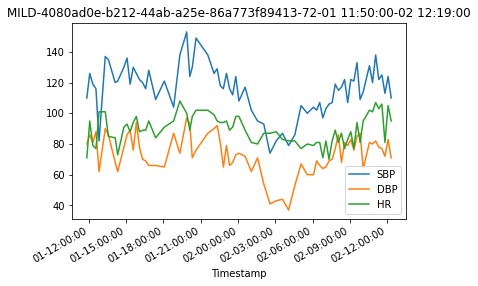

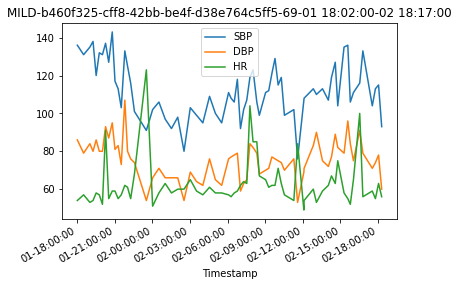

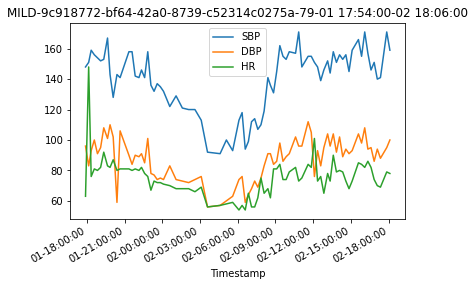

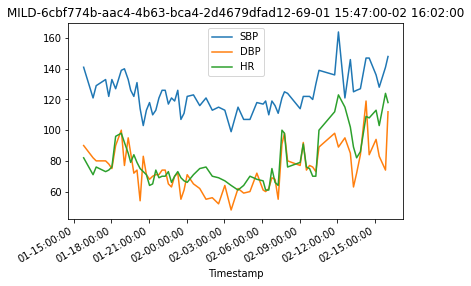

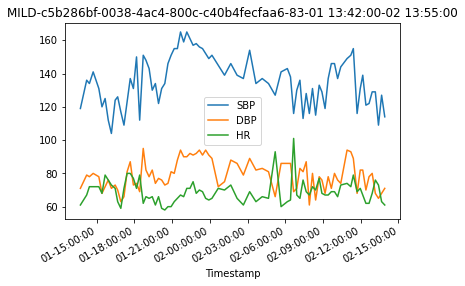

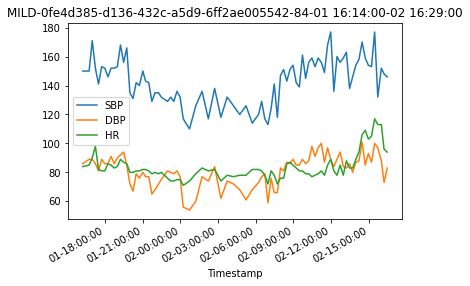

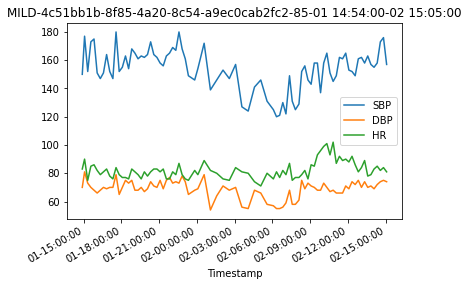

In [34]:
for unid in df_patient_mild["UNID"].unique().tolist():
  df_patient = df_patient_mild[df_patient_mild["UNID"]==unid]
  plot = df_patient[['Timestamp','SBP','DBP','HR']].plot(x='Timestamp', title='MILD-'+unid+'-'+str(len(df_patient))+'-'+df_patient["Timestamp"].min().strftime('%d %H:%M:%S')+'-'+df_patient["Timestamp"].max().strftime('%d %H:%M:%S'), )
  plot.xaxis.set_major_formatter(date_form)
  fig = plot.get_figure()
  #fig.savefig('./plots/SEVERE-'+unid+".png")
  fig.savefig('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /plots2/MILD-'+unid+".png")
  

In [35]:
### !zip -r myzip.zip plots

In [36]:
df_patient_moderate = df_new_merge[df_new_merge["OSA_Severity"]=='3']
df_patient_moderate = df_patient_moderate[df_patient_moderate["MonDay"].isin([1,2,3,4])]
df_patient_moderate['MonDay'].value_counts()

2    3415
1    3068
Name: MonDay, dtype: int64

In [37]:
df_temp_moderate= df_patient_moderate
df_temp_moderate['Timestamp'] = 'Jan '+df_temp_moderate['MonDay'].astype(str)+' 2011 '+df_temp_moderate['Time'].str.split(':',n=1).str[-1]
df_patient_moderate = df_temp_moderate.drop(['Time', 'MonDay'], axis=1)
df_patient_moderate

,UNID,SBP,DBP,HR,OSA_Severity,Timestamp
0,1907f4a6-b068-428d-a88e-38ca9df121f6,54,29,60,3,Jan 1 2011 15:25:00
1,1907f4a6-b068-428d-a88e-38ca9df121f6,62,38,60,3,Jan 1 2011 15:55:00
2,1907f4a6-b068-428d-a88e-38ca9df121f6,64,33,59,3,Jan 1 2011 15:40:00
3,1907f4a6-b068-428d-a88e-38ca9df121f6,68,44,60,3,Jan 1 2011 16:10:00
4,1907f4a6-b068-428d-a88e-38ca9df121f6,76,52,62,3,Jan 1 2011 14:10:00
...,...,...,...,...,...,...
21734,c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc,184,115,80,3,Jan 2 2011 09:58:00
21735,c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc,185,106,80,3,Jan 1 2011 10:41:00
21736,c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc,185,97,92,3,Jan 1 2011 13:41:00
21737,c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc,185,106,93,3,Jan 1 2011 18:56:00


In [38]:
df_patient_moderate['Timestamp'] = pd.to_datetime(df_patient_moderate['Timestamp'], format = "%b %d %Y %H:%M:%S")

In [39]:
#for unid in df_patient_moderate["UNID"].unique().tolist():
  #df_patient = df_patient_moderate[df_patient_moderate["UNID"]==unid]
  #print(unid,'\t',len(df_patient), '\t',df_patient["Timestamp"].min().strftime('%d %H:%M:%S'),'\t',df_patient["Timestamp"].max().strftime('%d %H:%M:%S'))


for unid in df_patient_moderate["UNID"].unique().tolist():
  df_patient = df_patient_moderate[df_patient_moderate["UNID"]==unid]
  plot = df_patient[['Timestamp','SBP','DBP','HR']].plot(x='Timestamp', title='MODERATE-'+unid+'-'+str(len(df_patient))+'-'+df_patient["Timestamp"].min().strftime('%d %H:%M:%S')+'-'+df_patient["Timestamp"].max().strftime('%d %H:%M:%S'), )
  plot.xaxis.set_major_formatter(date_form)
  fig = plot.get_figure()
  fig.savefig('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /plots2/MODERATE-'+unid+".png")
  

Output hidden; open in https://colab.research.google.com to view.

In [40]:
df_patient_severe = df_new_merge[df_new_merge["OSA_Severity"]=='4']
df_patient_severe = df_patient_severe[df_patient_severe["MonDay"].isin([1,2,3,4])]
df_patient_severe['MonDay'].value_counts()

1    7669
2    7438
Name: MonDay, dtype: int64

In [41]:
df_temp_severe= df_patient_severe
df_temp_severe['Timestamp'] = 'Jan '+df_temp_severe['MonDay'].astype(str)+' 2011 '+df_temp_severe['Time'].str.split(':',n=1).str[-1]
df_patient_severe = df_patient_severe.drop(['Time', 'MonDay'], axis=1)
df_patient_severe

,UNID,SBP,DBP,HR,OSA_Severity,Timestamp
85,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,67,49,68,4,Jan 1 2011 21:43:00
86,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,69,46,74,4,Jan 1 2011 21:28:00
87,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,73,46,75,4,Jan 1 2011 20:43:00
88,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,74,51,73,4,Jan 1 2011 20:58:00
89,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,80,53,73,4,Jan 1 2011 20:28:00
...,...,...,...,...,...,...
22211,4df07e13-4a0b-4da8-a960-66d18dba96eb,220,140,105,4,Jan 1 2011 17:20:00
22212,4df07e13-4a0b-4da8-a960-66d18dba96eb,221,140,88,4,Jan 1 2011 18:50:00
22213,4df07e13-4a0b-4da8-a960-66d18dba96eb,226,131,93,4,Jan 1 2011 20:20:00
22214,4df07e13-4a0b-4da8-a960-66d18dba96eb,233,147,84,4,Jan 1 2011 19:20:00


In [42]:
df_patient_severe['Timestamp'] = pd.to_datetime(df_patient_severe['Timestamp'], format = "%b %d %Y %H:%M:%S")

In [43]:
#for unid in df_patient_severe["UNID"].unique().tolist():
 # df_patient = df_patient_severe[df_patient_severe["UNID"]==unid]
  #print(unid,'\t',len(df_patient), '\t',df_patient["Timestamp"].min().strftime('%d %H:%M:%S'),'\t',df_patient["Timestamp"].max().strftime('%d %H:%M:%S'))


for unid in df_patient_severe["UNID"].unique().tolist():
  df_patient = df_patient_severe[df_patient_severe["UNID"]==unid]
  plot = df_patient[['Timestamp','SBP','DBP','HR']].plot(x='Timestamp', title='SEVERE-'+unid+'-'+str(len(df_patient))+'-'+df_patient["Timestamp"].min().strftime('%d %H:%M:%S')+'-'+df_patient["Timestamp"].max().strftime('%d %H:%M:%S'), )
  plot.xaxis.set_major_formatter(date_form)
  fig = plot.get_figure()
  fig.savefig('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /plots2/SEVERE-'+unid+".png")

Output hidden; open in https://colab.research.google.com to view.

In [44]:
#for index, row in df_patient_mild.iterrows():
 # print(row["UNID"])

In [45]:
#df_new_merge.to_csv('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /timemerge1.csv', index = False)